<a href="https://colab.research.google.com/github/sksamima5/Netflix-movies-and-TV-shows-clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#**Importing libraries**

In [58]:
#importing the required modules
import pandas as pd
import numpy as np
import sklearn
import pylab
import spacy
import en_core_web_sm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#importing module for name entity recognization (NER)
from nltk import ne_chunk

#module for tokenizing
from nltk import word_tokenize, sent_tokenize

#module for steming
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer


#vectorizer for creating a document term matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

#module for stopwords
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from wordcloud import wordcloud

#importing libraries for clustereing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import silhouette_samples, silhouette_score


from scipy.cluster.hierarchy import linkage
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 

In [59]:
# installing a package called 'neattext' for cleaning textual data and text preprocessing.
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
# importing neattext's functions
import neattext.functions as nfx

#**Mount the Drive and import the dataset**

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
netflix = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

#**Let's Explore and Understand about the data** 

In [64]:
#checking the top first 5 rows of the data
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [65]:
#Checking last 5 rows(tail) of Data
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [66]:
#checking the rows of dataset with rows and columns
print(f' The shape of dataset is {(netflix.shape)} \n Total Rows are : {(netflix.shape)[0]}\n Total Columns are : {(netflix.shape)[1]}')

 The shape of dataset is (7787, 12) 
 Total Rows are : 7787
 Total Columns are : 12


In [67]:
#check the details about the data
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [68]:
#check all the duplicates
netflix.duplicated().sum()

0

**Points to be noted:**📝

* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.

In [69]:
#check all the columns of the dataset
print(f'All the column of the dataset')
netflix.columns

All the column of the dataset


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [70]:
#checking the description of dataset
netflix.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


#**Preprocessing the Dataset**

In [71]:
#checking the null/missing values
netflix.isnull().sum()/netflix.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

### **Observation and solution:**
#### 1. **Rating** = We can see from the above, the percentage of null values in this rating attribute is 0.0898. So we decided to replace the null values with the most frequent value of rating column. and it is **TV-MA**.

#### 2. **CAST** = Cast attribute has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform Exploratory Data Analysis.

#### 3. **DIRECTOR** = This attribute contains more than 30% missing values. And we have decided to drop this column completely as it not relevant for this project.

#### 4. **DATE_ADDED** = around 0.13 percent of date data are missing so we decided to drop the null values.

#### 5. **COUNTRY** = In this attribute, we decided to do the same thing as we are going to do with the RATING attribute. Replacing null values with the MODE value.

**Dropping the unnecessary columns** 

In [72]:
#treating all the null values according to the solution above mentioned 
netflix['rating'].replace(np.nan, 'TV-MA', inplace=True) #replacing nan values with TV-MA
netflix['cast'].replace(np.nan, 'missing_info', inplace=True) #replacing nan values with missing_info
netflix.drop(['director','date_added','release_year', 'duration', 'show_id'], axis=1, inplace=True) #droping the columns which are not useful

In [73]:
netflix['country'].fillna(netflix['country'].mode()[0], inplace=True)

In [74]:
netflix.head()

,type,title,cast,country,rating,listed_in,description
0,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...


In [75]:
#checking the count of the value of type attribute
netflix['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [76]:
#lets change all the character of title into lower
netflix['title'].str.lower()

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       zozo
7783                                     zubaan
7784                          zulu man in japan
7785                      zumbo's just desserts
7786    zz top: that little ol' band from texas
Name: title, Length: 7787, dtype: object

In [77]:
# if any values in the title attribute contains special characters then removing them with the help of neattext functions = remove_special_characters.
netflix['title'] = netflix['title'].str.lower().apply(lambda x : nfx.remove_special_characters(x))

In [78]:
# if any values in the title attribute contains stop words then removing them with the help of neattext functions = remove_stopwords
netflix['title'] = netflix['title'].str.lower().apply(lambda x : nfx.remove_stopwords(x))

In [79]:
#creating a cast column again by splitting the values with the comma
netflix['cast'] = netflix['cast'].apply(lambda x : x.split(','))

In [80]:
# to check whether the special characters and stop words were removed or not.
netflix['title'].unique

<bound method Series.unique of 0                             3
1                           719
2                          2359
3                             9
4                            21
                 ...           
7782                       zozo
7783                     zubaan
7784             zulu man japan
7785            zumbos desserts
7786    zz little ol band texas
Name: title, Length: 7787, dtype: object>

In [81]:
#checking the attributes that still if there are any null values in each attribute
netflix.isnull().sum()

type           0
title          0
cast           0
country        0
rating         0
listed_in      0
description    0
dtype: int64

### **Spitting the values of the TYPE content into MOVIES and TV Shows**

In [82]:
#Movie content data 
netflix_movies = netflix[netflix['type']=='Movie'].copy()
netflix_movies.head()


,type,title,cast,country,rating,listed_in,description
1,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,PG-13,Dramas,A brilliant group of students become card-coun...
6,Movie,122,"[Amina Khalil, Ahmed Dawood, Tarek Lotfy, A...",Egypt,TV-MA,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [83]:
#TV content data
netflix_tv = netflix[netflix['type']=='TV Show'].copy()
netflix_tv.head()

,type,title,cast,country,rating,listed_in,description
0,TV Show,3,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,TV Show,46,"[Erdal Beşikçioğlu, Yasemin Allen, Melis Bir...",Turkey,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,TV Show,1983,"[Robert Więckiewicz, Maciej Musiał, Michalin...","Poland, United States",TV-MA,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,TV Show,1994,[missing_info],Mexico,TV-MA,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,TV Show,feb09,"[Shahd El Yaseen, Shaila Sabt, Hala, Hanadi...",United States,TV-14,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


# **EXPLORATORY DATA ANALYSIS**

### **Percentage distribution of content among all the countries**

In [84]:
country = netflix['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

### Observation:
#### **This pie chart tells us that 53.9% of the producers who produced Netflix movies/shows are from United States followed by India around 16.3%**

###**Values count of Movies & TV Shows in the dataset**

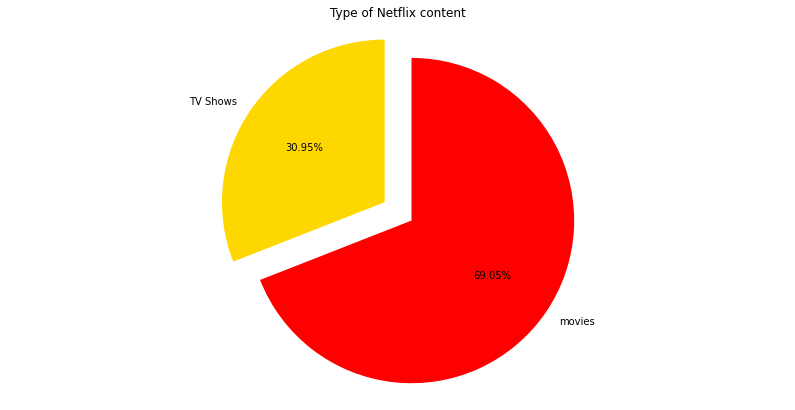

In [85]:
# Plotting a piechart which tells the values count of type content(Movies and TV Shows) in the dataset.
plt.figure(figsize = (14,7))
labels = ['TV Shows', 'movies']
plt.pie(netflix['type'].value_counts().sort_values(), labels=labels, explode=[0.1,0.1],
        autopct = '%1.2f%%', colors = ['Gold','red'], startangle=90)
plt.title('Type of Netflix content')
plt.axis('equal')
plt.show()

###**Observation:**
####**1. The percentage of distribution of Movies Content is 69.14%**
####**2. The percentage distribution of TV Shows Content is 30.86%**

In [86]:
# Checking the unique values of the rating attribute
netflix['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

###**RATING AND THEIR MEANINGS**

####TV-MA: Mature Audience Only

####R: Restricted

####PG-13: Parents Strongly Cautioned

####TV-14: Parents Strongly Cautioned

####TV-PG: Parental Guidance Suggested

####NR :Not Rated

####TV-G: General Audience

####TV-Y: Programs aimed at a very young audience

####TV-Y7: Directed to Older Children

####PG: Parental Guidance Suggested

####G: General Audiences

####NC-17: Clearly Adult

####TV-Y7 FV: Directed to Older Children - Fantasy Violence

####UR: Unrated

In [87]:
# Creating new column where we are giving appropriate names according to the suitable age to each official ratings
age_rating_names = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
# adding a new column in the dataset which is replacing the original rating values with age_rating_names
netflix['age_rating'] = netflix['rating'].replace(age_rating_names)

#checking the unique values of age_rating attribute
netflix['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

###**Total count of the TYPE content wrt unique age_rating values**

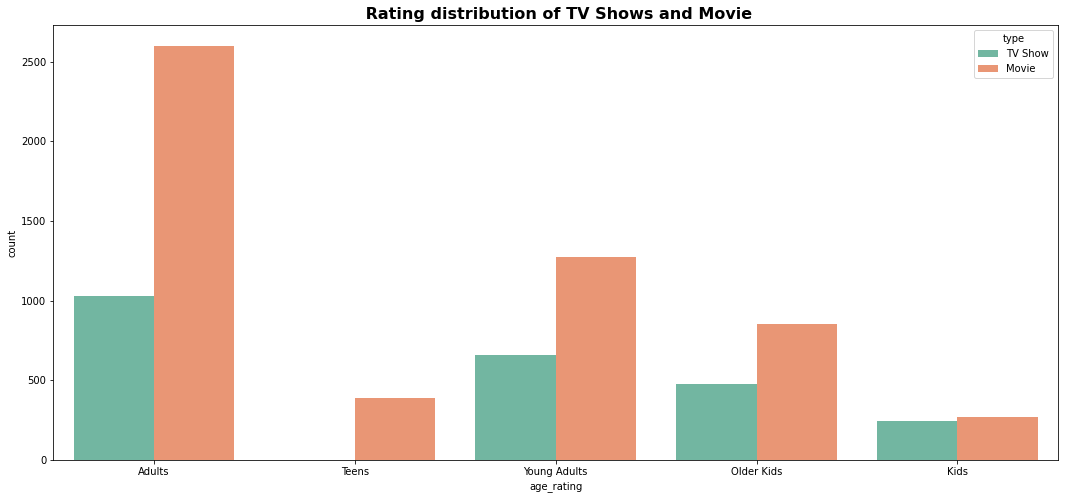

In [88]:
#creating a bar chart which tells the number of MOVIES and TV shows content wrt to unique age_rating values
plt.figure(figsize=(18,8))
sns.countplot(x='age_rating',hue='type', data=netflix, palette="Set2")
plt.title(' Rating distribution of TV Shows and Movie',size='16',fontweight="bold")
plt.show()

###Observation:

####It clearly tells that the count of Adult movies is high which is more than 2500.
####There are no teen shows in Netflix, only teen movies.

### **TOP  Ratings wrt TV Shows count separately**

In [89]:
# creating a dataframe which shows the count of the TV shows wrt different ratings
TV_shows_rating = netflix_tv.groupby(['rating'])['type'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
TV_shows_rating.style.background_gradient(cmap='Greens')

,rating,count
4,TV-MA,1020
2,TV-14,659
5,TV-PG,301
7,TV-Y7,176
6,TV-Y,163
3,TV-G,83
0,NR,5
1,R,2
8,TV-Y7-FV,1


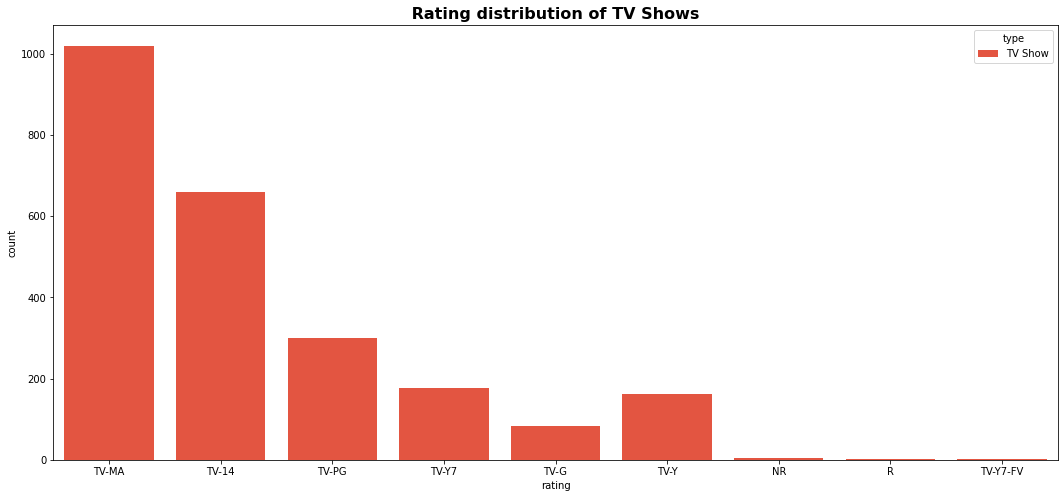

In [90]:
# creating a barchart which tells the count of TV shows content wrt ratings
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=netflix_tv,palette="CMRmap")
plt.title(' Rating distribution of TV Shows ',size='16',fontweight="bold")
plt.show()

###Observation:
####**As we already seen in the previous EDA barchart that the Adult rating content's count is high and here the same thing is concluded that the Adult contents of TV shows is high. = TV-MA = Mature Audience Only**

#**Data preprocessing for "Description" attributes**#

In [91]:
#checking the first row values for the description attribute
netflix['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [92]:
#creating a function which gives the length of the description attribute's values
def length(text):
  '''a function which returns the length of text'''
  return len(text)

In [93]:
#creating a new column which gives the length of the description attribute's values
netflix['length_of_description_Before'] = netflix['description'].apply(length)
netflix.head()

,type,title,cast,country,rating,listed_in,description,age_rating,length_of_description_Before
0,TV Show,3,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,136
1,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,148
2,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,149
3,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,145
4,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,PG-13,Dramas,A brilliant group of students become card-coun...,Teens,143


###**Removing Punctuation**###

In [94]:
#creating a function called remove_punctuation and using this function to appy on the description data in the dataset
def remove_punctuation(text):
  '''a function for removing punctuation'''
  import string 
  translator = str.maketrans('','', string.punctuation) #replacing the punctuations with no space, which in effect deletes the punctuation marks 
  return text.translate(translator) #return the text stripped of punctuation marks

In [95]:
#applying above created function on the description data to remove punctuations
netflix['description'] = netflix['description'].apply(remove_punctuation)
netflix.head()

,type,title,cast,country,rating,listed_in,description,age_rating,length_of_description_Before
0,TV Show,3,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,136
1,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,148
2,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,R,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,Adults,149
3,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,Teens,145
4,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,PG-13,Dramas,A brilliant group of students become cardcount...,Teens,143


In [96]:
#stop words 
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array({'them', 'when', 'more', "couldn't", 'too', 'yours', 'out', 'won', 'same', 'o', "you're", 'ma', 'very', 'if', "you've", "needn't", 'who', 'wouldn', "you'd", "doesn't", "won't", 'after', 'herself', 'be', 'some', 'these', 'until', 'before', 'other', 'any', 'this', 'into', 'few', 's', "isn't", 'ours', 'doing', 'that', 'at', "it's", 'isn', 'i', 'a', 'ourselves', 'in', 'once', 'aren', "haven't", 'no', 'we', 'doesn', 'just', 'theirs', 'between', 'again', 'there', 'ain', 're', 'against', 'itself', 'but', 'on', 'hadn', 'for', 'or', 'all', 'their', "hadn't", 'having', 'by', 'mustn', "wasn't", 'don', 'to', 'as', 'under', 'will', 'was', 'up', 'each', 'of', 'wasn', "didn't", 'during', 'yourselves', 'nor', "weren't", 'are', 'about', 'himself', 'have', "hasn't", 'is', 'further', 'most', 'here', 'it', 'its', 'your', 'down', 'why', 've', "aren't", 'were', 'both', 'mightn', 'weren', "she's", 'did', 'where', 'our', 'shan', 'below', "wouldn't", 'his', 'now', 'the', 'had', 'does', 'themselves', 'wit

In [97]:
#print no. of stopwors
print('The total numbers of stopwords is', len(stop_words))

The total numbers of stopwords is 179


In [98]:
#creating a function for removing the stopwords in the description attribute
def stopwords(text):
  '''a function for removing the stopwords'''
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text) # joining the list of words with space separator

In [99]:
#applying above function on the DESCRIPTION attribute
netflix['description'] = netflix['description'].apply(stopwords)

In [100]:
#checking the description attribute after removing stop words
netflix['description'].head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: description, dtype: object

In [101]:
#Lets creating a function of stemming function using SnowballStemmer module
stemmer = SnowballStemmer("english")

def stemming(text):
  '''a function which stems each word in the given text'''
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [102]:
#applying above function on the DESCRIPTION attribute
netflix['description'] = netflix['description'].apply(stemming)
netflix['description'].head()

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
Name: description, dtype: object

In [103]:
# creating a new column which gives the length of the description attribute's values 
netflix['length_of_description_after'] = netflix['description'].apply(length)
netflix.head()

,type,title,cast,country,rating,listed_in,description,age_rating,length_of_description_Before,length_of_description_after
0,TV Show,3,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,Adults,136,82
1,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,TV-MA,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,Adults,148,88
2,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,R,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,Adults,149,102
3,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,Teens,145,89
4,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,PG-13,Dramas,brilliant group student becom cardcount expert...,Teens,143,99


##**For 'listed_in' attribute**

In [104]:
#checking the length of the text values of listed_in attribute before removing punctuations, stopwords or do stemming.
netflix['length_ of_listed_in_before'] = netflix['listed_in'].apply(length)

In [105]:
#applying stopwords function on the listed_in attribute
netflix['listed_in'] = netflix['listed_in'].apply(stopwords)

In [106]:
#applying removing punctuation function on the listed_in attribute
netflix['listed_in'] = netflix['listed_in'].apply(remove_punctuation)

In [107]:
#applying stemming function on the listed_in attribute
netflix['listed_in'] = netflix['listed_in'].apply(stemming)

In [108]:
#checking the length of the text values of listed_in attribute after removing punctuations, stopwords or do stemming.
netflix['length_ of_listed_in_after '] = netflix['listed_in'].apply(length)

In [109]:
netflix.head()

,type,title,cast,country,rating,listed_in,description,age_rating,length_of_description_Before,length_of_description_after,length_ of_listed_in_before,length_ of_listed_in_after
0,TV Show,3,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,TV-MA,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,Adults,136,82,54,40
1,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,TV-MA,drama intern movi,devast earthquak hit mexico citi trap survivor...,Adults,148,88,28,17
2,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,R,horror movi intern movi,armi recruit found dead fellow soldier forc co...,Adults,149,102,35,23
3,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,PG-13,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,Teens,145,89,56,43
4,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,PG-13,drama,brilliant group student becom cardcount expert...,Teens,143,99,6,5


###**Observation:**
####**Before and after doing stemming, removing stop words, removing punctuations, we can see the length of the text values of both DESCRIPTION and LISTED_IN in the dataframe. There is a lot of changes in the length of the text values before and after stemming, removing stop words, removing punctuations.**

# **Natural Language Processing (NLP) Model**

For the NLP portion of this project, I will first convert all plot descriptions to word vectors so they can be processed by the NLP model. Then, the similarity between all word vectors will be calculated using cosine similarity (measures the angle between two vectors, resulting in a score between -1 and 1, corresponding to complete oppositses or perfectly similar vectors). Finally, I will extract the 5 movies or TV shows with the most similar plot description to a given movie or TV show.

In [47]:
!pip install matplotlib-venn
import en_core_web_sm
nlp = en_core_web_sm.load()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
# Load the large model to get the vectors
!nlp = spacy.load('en_core_web_lg')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `nlp = spacy.load('en_core_web_lg')'


In [49]:
#Create word vbector for all movies and TV shows Description